# Project Summary: Client Subscribed to a Term Deposit


## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bankmarketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Handle missing values
print("Missing Values Before Cleaning:\n", df.isnull().sum())
df_clean = df.dropna()  
print("\nMissing Values After Cleaning:\n", df_clean.isnull().sum())
print("\nShape After Cleaning:", df_clean.shape)

Missing Values Before Cleaning:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Missing Values After Cleaning:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Shape After Cleaning: (41188, 21)


Columns in df_clean: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


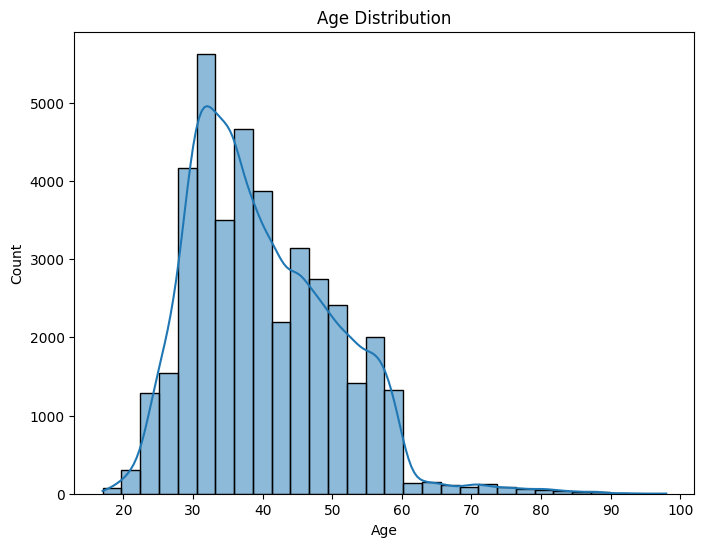

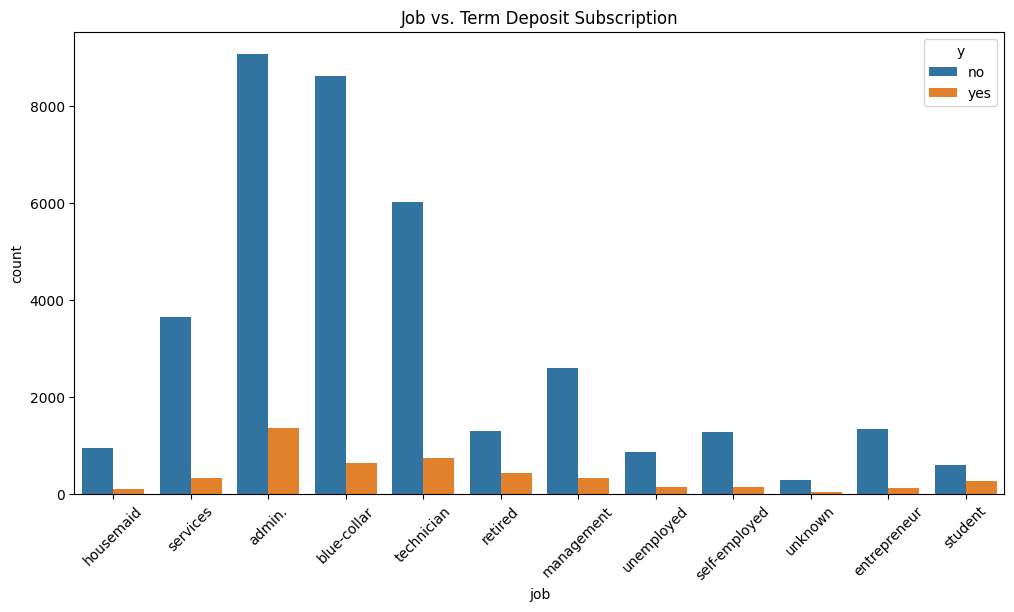

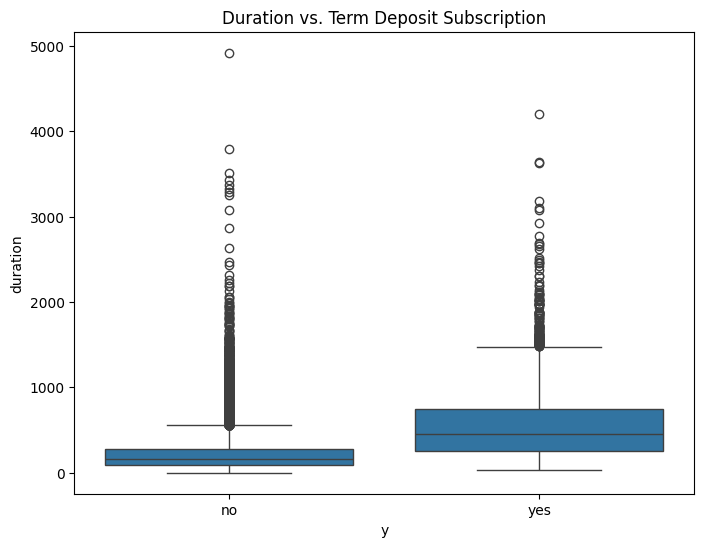

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names in df_clean
print("Columns in df_clean:", df_clean.columns.tolist())

# Distribution of a key numerical feature (e.g., 'age')
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Relationship between a categorical feature (e.g., 'job') and target
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df_clean)
plt.title('Job vs. Term Deposit Subscription')
plt.xticks(rotation=45)
plt.show()

# Boxplot for numerical feature vs. target (use 'duration' if 'balance' is unavailable)
numerical_col = 'balance' if 'balance' in df_clean.columns else 'duration'
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y=numerical_col, data=df_clean)
plt.title(f'{numerical_col.capitalize()} vs. Term Deposit Subscription')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.drop('y')  
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Apply preprocessing
X = df_clean.drop('y', axis=1)
y = df_clean['y'].map({'yes': 1, 'no': 0})  
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(numerical_cols) + list(cat_feature_names)
print("Preprocessed Feature Names:", feature_names)

Preprocessed Feature Names: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']


In [6]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42, stratify=y)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (32950, 53)
Testing Set Shape: (8238, 53)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nEvaluation for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Evaluation for Logistic Regression:
Accuracy: 0.9161
Precision: 0.7083
Recall: 0.4343
F1-Score: 0.5384

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.43      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238


Evaluation for Decision Tree:
Accuracy: 0.8948
Precision: 0.5322
Recall: 0.5431
F1-Score: 0.5376

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.54      0.54       928

    accuracy                           0.89      8238
   macro avg       0.74      0.74      0.74      8238
weighted avg       0.90      0.89      0.90      8238


Evaluation for Random Forest:
Accuracy: 0.9159
Precision: 0.6741
Recall: 0.4903
F1-Score: 0.567


## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
